A. Import The Necessary Packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import pandas as pd

C:\Users\ADMIN\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


B. Load the training and testing data

In [2]:
test = pd.read_csv("./mnist_test.csv")
train = pd.read_csv("./mnist_train.csv")

In [3]:
x_train = train.drop("label", axis=1)
x_test = test.drop("label", axis=1)

In [4]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [5]:
y_train = train["label"]
y_test = test["label"]

In [6]:
y_train =to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
x_train.shape


(60000, 784)

c. Define the network architecture using Keras

In [8]:
model=models.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(64,activation='relu'),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])

d. Train the model using SGD with 11 epochs

In [9]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,epochs=11,validation_data=(x_test,y_test))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.6120 - loss: 1.2745 - val_accuracy: 0.9131 - val_loss: 0.3052
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9139 - loss: 0.2996 - val_accuracy: 0.9314 - val_loss: 0.2306
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9329 - loss: 0.2280 - val_accuracy: 0.9466 - val_loss: 0.1856
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9445 - loss: 0.1925 - val_accuracy: 0.9523 - val_loss: 0.1643
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9534 - loss: 0.1593 - val_accuracy: 0.9583 - val_loss: 0.1431
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9603 - loss: 0.1344 - val_accuracy: 0.9636 - val_loss: 0.1271
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9652 - loss: 0.1173 - val_accuracy: 0.9662 - val_loss: 0.1181
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9686 - loss: 0.

e. Evaluate the network

In [10]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print(f"Test accuracy: {test_acc}\n")
print(f"Test loss: {test_loss}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9644 - loss: 0.1164
Test accuracy: 0.9714000225067139

Test loss: 0.09690811485052109


f. Plot the training loss and accuracy

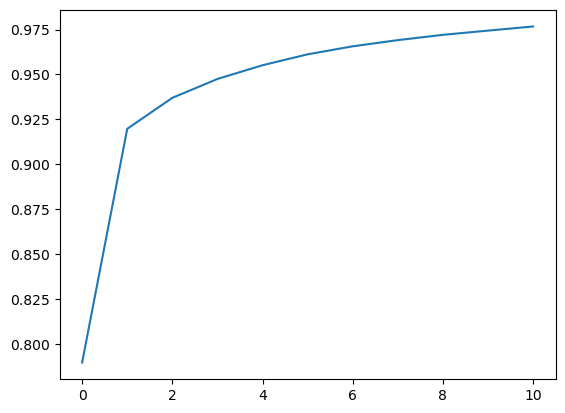

In [11]:
plt.plot(history.history["accuracy"])

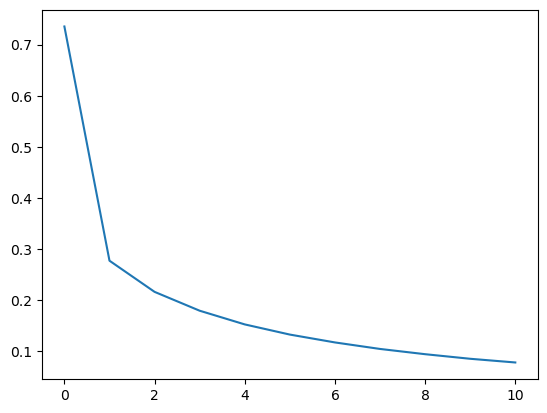

In [12]:
plt.plot(history.history["loss"])
